<a href="https://colab.research.google.com/github/alicegbrr/2024_Geoinformatique_I/blob/main/Geoinformatique_I/IP/Exercices_IP/S4_IP_exercice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercice 4 - Fonction et calcul scientifique

## Numpy pour le calcul scientifique et Matplotlib

**Objectifs d'apprentissage**

* Créer de nouveaux tableaux en utilisant `linspace` et `arange`.
* Calculer des formules de base avec les tableaux `numpy`.
Charger des données à partir de fichiers `.npy` * Effectuer des réductions (par exemple `.npy`)
* Effectuer des réductions (par exemple `mean`, `std` sur les tableaux `numpy`)
* Réaliser des tracés linéaires 1D
* Réaliser des diagrammes de dispersion
* Annoter les graphiques avec des titres et des axes

Dans ce problème, nous utilisons des données réelles provenant de flotteurs de profilage océanique. Les flotteurs [ARGO](http://www.argo.ucsd.edu/) sont des instruments robotiques autonomes qui recueillent des données sur la température, la salinité et la pression de l'océan. Les flotteurs [ARGO](http://www.argo.ucsd.edu/) recueillent un "profil" (un ensemble de mesures à différentes profondeurs ou "niveaux").

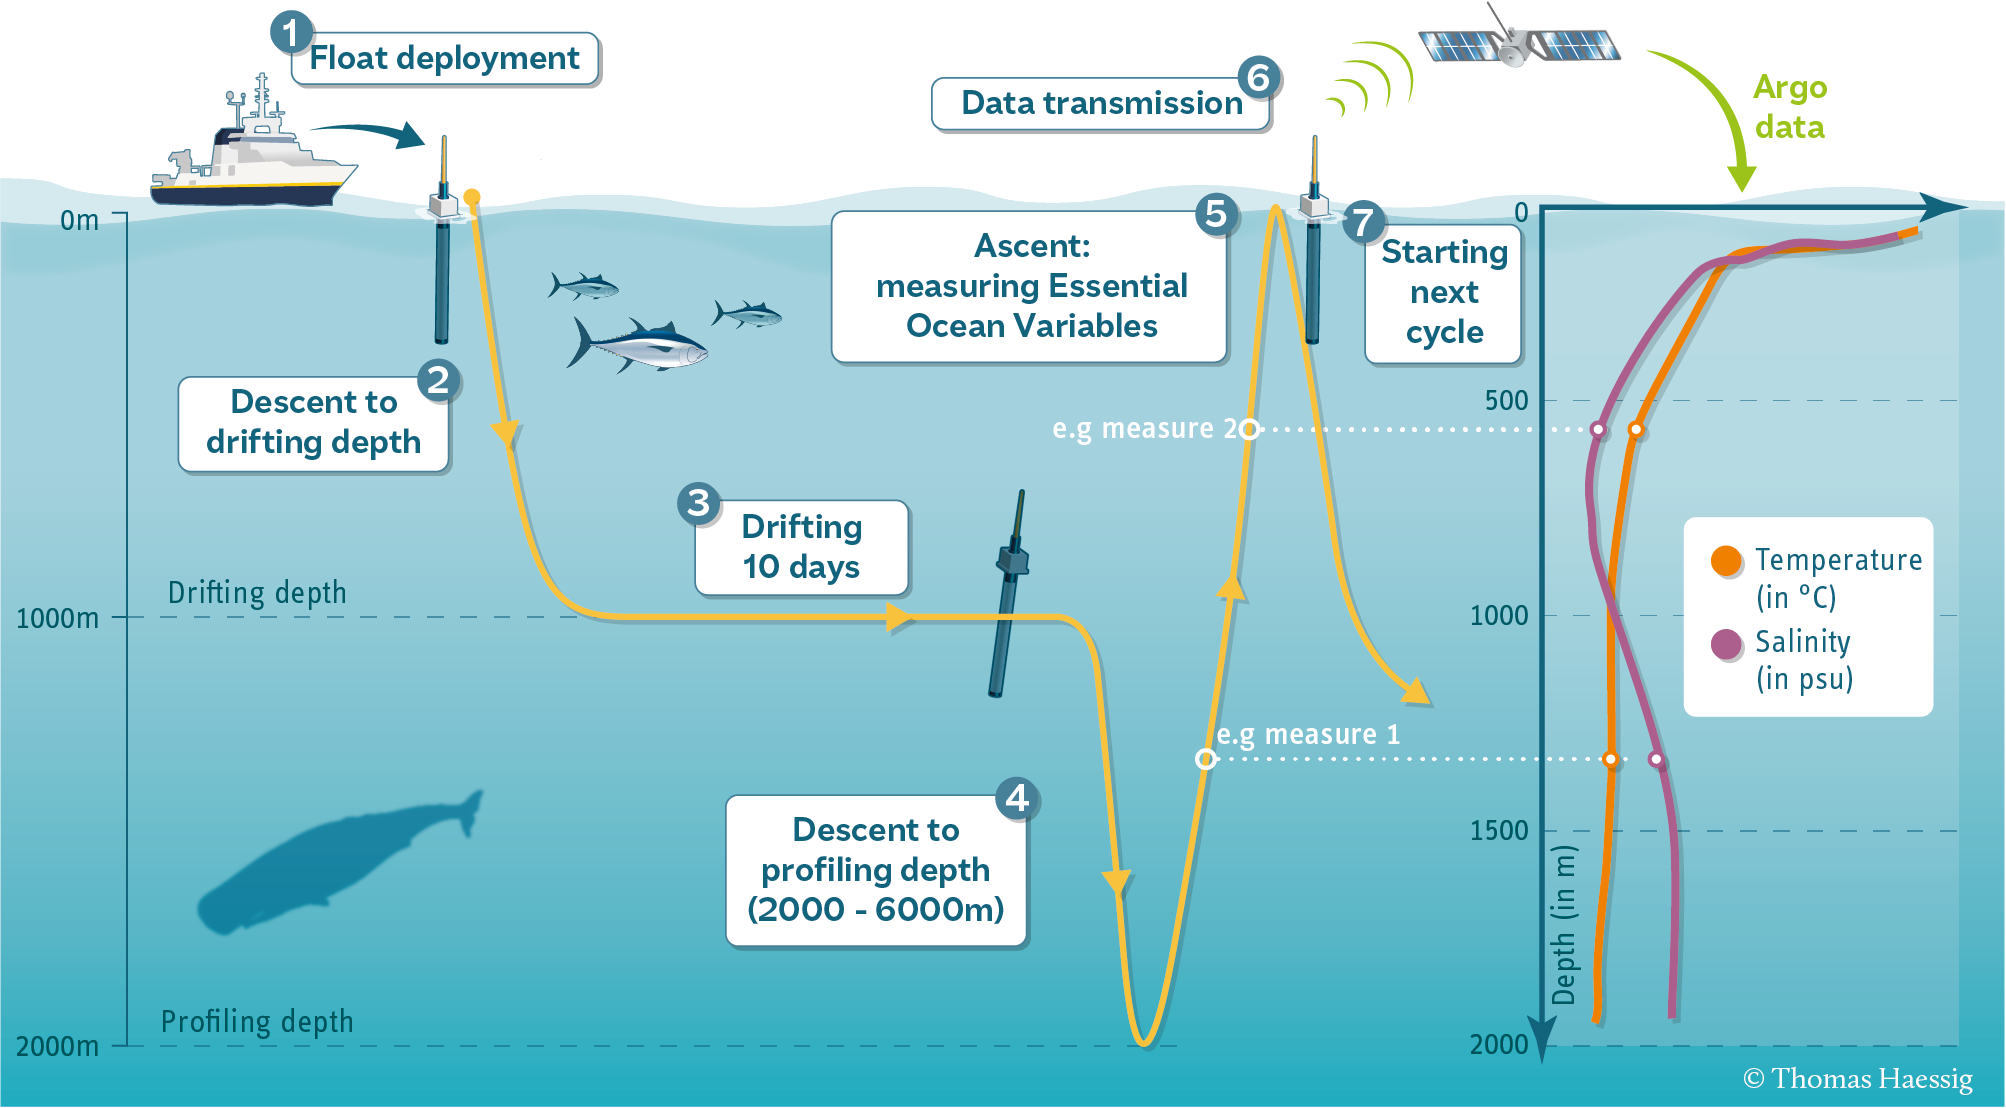


Chaque profil est associé à une latitude, une longitude et une date, ainsi qu'à de nombreux niveaux différents.

Commençons par utiliser [pooch](https://www.fatiando.org/pooch/latest/) pour télécharger les fichiers de données dont nous avons besoin pour cet exercice. Le code suivant vous donnera une liste de fichiers `.npy` que vous pourrez ouvrir à l'étape suivante.

In [2]:
import pooch

url = "https://unils-my.sharepoint.com/:u:/g/personal/tom_beucler_unil_ch/EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ?download=1"
files = pooch.retrieve(url, processor=pooch.Unzip(), known_hash='2a703c720302c682f1662181d329c9f22f9f10e1539dc2d6082160a469165009')
files

Unzipping contents of '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ' to '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip'


['/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/levels.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/S.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/T.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/lon.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/lat.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/date.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/P.npy']

In [3]:
import numpy as np

**Q1) Chargez chaque fichier de données sous la forme d'un tableau `numpy`.**

Vous pouvez utiliser les noms que vous voulez pour vos tableaux, mais nous recommandons :

`T` : température

`S` : salinité

`P` : pression

`date` : date

`lat` : latitude

`lon` : longitude

`level` : niveau de profondeur

Astuce 1 : Regardez le nom du fichier (les éléments dans `files`) pour savoir quel fichier correspond à quelle variable.

Astuce 2 : Consultez la documentation de [`np.load`](https://numpy.org/doc/stable/reference/generated/numpy.load.html).

Affichez les noms des éléments des fichiers ici

In [4]:
print (files)

['/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/levels.npy', '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/S.npy', '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/T.npy', '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/lon.npy', '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/lat.npy', '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/date.npy', '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/P.npy']


Ensuite, chargez les fichiers sous forme de tableaux `numpy`, par exemple en utilisant la compréhension de liste

In [6]:
levels, S, T, lon, lat, date, P = [np.load(files[i]) for i in range(len(files))]

In [ ]:
#@title Code à compléter (au besoin)
___,___,___,___,___,___,___ = [np.___(___[___]) for ___ in range(___)]

**Q2) Recréez le tableau `level` en utilisant `np.arange` et `np.linspace`**.

Conseils :

* La documentation de `np.arange` est [at this link](https://numpy.org/devdocs/reference/generated/numpy.arange.html)
* La documentation pour `np.linspace` est [à ce lien](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)
* La documentation pour `np.testing.assert_equal` est [at this link](https://numpy.org/doc/stable/reference/generated/numpy.testing.assert_equal.html)

Affichez le tableau `level` (niveau)

In [7]:
print(levels)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77]


Recréez le tableau `level` en utilisant `np.arange` et l'appeler `level_arange`

In [8]:
levels_arange = np.arange(0,78)
print(levels_arange)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77]


In [8]:
#@title Code à compléter (au besoin)
level_arange = np.arange()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

Vérifiez que `level` et `level_arange` sont égaux en utilisant `np.testing.assert_equal`

In [9]:
np.testing.assert_equal(levels,levels_arange)

In [ ]:
#@title Code à compléter (au besoin)
np.___.___(___,level_arange)

Recréer le tableau `level` en utilisant `np.linspace` et l'appeler `level_linspace`

In [10]:
levels_linspace = np.linspace(0,78)
print(levels_linspace)

[ 0.          1.59183673  3.18367347  4.7755102   6.36734694  7.95918367
  9.55102041 11.14285714 12.73469388 14.32653061 15.91836735 17.51020408
 19.10204082 20.69387755 22.28571429 23.87755102 25.46938776 27.06122449
 28.65306122 30.24489796 31.83673469 33.42857143 35.02040816 36.6122449
 38.20408163 39.79591837 41.3877551  42.97959184 44.57142857 46.16326531
 47.75510204 49.34693878 50.93877551 52.53061224 54.12244898 55.71428571
 57.30612245 58.89795918 60.48979592 62.08163265 63.67346939 65.26530612
 66.85714286 68.44897959 70.04081633 71.63265306 73.2244898  74.81632653
 76.40816327 78.        ]


In [ ]:
#@title Code à compléter (au besoin)
___ = np.___(___,___,___)

Vérifiez que `level` et `level_linspace` sont égaux en utilisant `np.testing.assert_equal`

In [11]:
np.testing.assert_equal(levels, levels_linspace)

AssertionError: 
Arrays are not equal

(shapes (78,), (50,) mismatch)
 x: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,...
 y: array([ 0.      ,  1.591837,  3.183673,  4.77551 ,  6.367347,  7.959184,
        9.55102 , 11.142857, 12.734694, 14.326531, 15.918367, 17.510204,
       19.102041, 20.693878, 22.285714, 23.877551, 25.469388, 27.061224,...

In [ ]:
#@title Code à compléter (au besoin)
___.___(___,___)

**Q3) Examinez les formes de `T`, `S` et `P` par rapport à `lon`, `lat`, `date` et `niveau`. Comment pensez-vous qu'ils sont liés ?**

Indice : consultez la sous-section [NDArrays](#NDArrays)

Affichez les formes de toutes les variables chargées

In [12]:
T.shape, S.shape, P.shape, lon.shape, lat.shape, date.shape, levels.shape

((78, 75), (78, 75), (78, 75), (75,), (75,), (75,), (78,))

In [ ]:
#@title Code à compléter (au besoin)
___.shape
___.___

D'après les formes, quelles sont les dimensions partagées entre les tableaux ?

**Q4) En vous basant sur la formule ci-dessous, calculez la densité de l'eau de mer `relative_density`, par rapport à l'eau pure, en fonction de la température, de la salinité et de la pression.**

`densité_relative`$ = ρ -ρ_{Eau pure} = a \times S +b \times \Theta + c \times \Theta^{2}$

où :

* Les densités $\rho$ et $ρ_{Pure\ eau}$ sont exprimées en unités $kg/m^{3}$.
* Les constantes $a$, $b$ et $c$ sont fournies ci-dessous.
* La fonction permettant de calculer la température conservative $\Theta$ (en unités Celcius) à partir de la température, de la salinité et de la pression est fournie ci-dessous.
* La température $T$ est exprimée en unités Celcius.
* La salinité $S$ est exprimée en unités $g/kg$.
* La pression $p$ est exprimée en unités $dbar$.

Astuce : Les tableaux `numpy` chargés `temperature`, `salinity`, et `pressure` ont déjà les bonnes unités et aucune conversion n'est nécessaire.

Sources :

1) [*Roquet, Fabien, et al. "Defining a simplified yet "realistic" equation of state for seawater." Journal of Physical Oceanography 45.10 (2015) : 2564-2579.*](https://journals.ametsoc.org/view/journals/phoc/45/10/jpo-d-15-0080.1.xml)

2) [*The Gibbs SeaWater (GSW)
Oceanographic Toolbox of TEOS-10*](https://www.teos-10.org/pubs/gsw/html/gsw_front_page.html). (Licence)](https://www.teos-10.org/pubs/gsw/html/gsw_licence.html)

Voici les constantes a, b et c :

In [13]:
a = 7.718e-1
b = -8.44e-2
c = -4.561e-3

Importons la bibliothèque [`gsw`] (https://teos-10.github.io/GSW-Python/) qui contient la fonction `CS_from_t` pour calculer la température conservative $\Theta$ à partir de la température, de la salinité et de la pression.

In [14]:
!pip install gsw
from gsw import CT_from_t

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 23.1 MB/s eta 0:00:00


Maintenant, c'est à vous de jouer. Voici l'équation pour éviter d'avoir à faire défiler la page vers le haut :

`densité_relative`$ = ρ -ρ_{Pure\ Eau} = a \times S +b \times \Theta + c \times \Theta^{2}$

Calculeuz la température conservatrice

Conseil : utilisez [CT_from_t](https://www.teos-10.org/pubs/gsw/html/gsw_CT_from_t.html)

In [15]:
T_cons = CT_from_t(T,S,P)
print (T_cons)

[[36.47031299 36.37031813 36.39674968 ... 36.64938733 36.47031944
  36.44354341]
 [36.47568444 36.37806652 36.39753306 ... 36.67008878 36.38874176
  36.44173653]
 [36.54183456 36.38247943 36.39610661 ... 36.66538084 36.47806601
  36.4405518 ]
 ...
 [35.95988036 35.96727486 35.96781985 ... 35.97893089 35.98471468
  35.98860053]
 [35.94783659 35.95538687 35.9544075  ... 35.9655832  35.97021007
  35.97454838]
 [35.9373659  35.94384121 35.94475444 ...         nan 35.95805866
          nan]]


In [ ]:
#@title Code à compléter (au besoin)
___ = CT_from_t(___,___,___)

Calculez la "densité relative" à l'aide de l'équation ci-dessus.

In [16]:
density_relativ = a*S + b*T_cons + c*T_cons**2
print (density_relativ)

[[18.36152674 18.3074983  18.34127024 ... 18.42715875 18.4688042
  18.39582104]
 [18.35542645 18.30967596 18.34171541 ... 18.41076618 18.35303668
  18.39580282]
 [18.36486576 18.31092749 18.34153802 ... 18.40115878 18.37679112
  18.39475388]
 ...
 [18.01515787 18.01831722 18.01809242 ... 18.02192599 18.02417064
  18.02719533]
 [18.02012438 18.0232203  18.02208142 ... 18.02588673 18.0270666
  18.03067945]
 [18.02598386 18.02798095 18.02760444 ...         nan 18.03207863
          nan]]


In [ ]:
#@title Code à compléter (au besoin)
___ = ___

**Q4) Faites un graphique pour chaque colonne de données dans `T`, `S`, `P`, et
`densité_relative` (quatre plots)**

Pour cette question, nous devons utiliser l'interface [Pyplot](https://matplotlib.org/stable/tutorials/introductory/pyplot.html) de la bibliothèque [Matplotlib](https://matplotlib.org/) pour la visualisation, même si nous ne l'avons pas encore étudiée en profondeur en classe. Mais n'ayez crainte, nous vous fournissons des instructions faciles à suivre ci-dessous. 😊

La première étape consiste à importer Pyplot. Il suffit d'exécuter le code ci-dessous.

In [17]:
import matplotlib.pyplot as plt

Ensuite, nous tracerons les variables en fonction de la profondeur de l'océan, `level`. Il suffit de lire la documentation [sur ce lien] (https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) pour en déduire la syntaxe correcte. Etiquetez vos axes en utilisant `plt.xlabel` et `plt.ylabel`, et ajoutez un titre en utilisant `plt.title`.

Astuce : L'échelle verticale doit utiliser les données `level` pour être cohérente avec les conventions océanographiques.

Conseil 2 : Chaque graphique doit avoir une ligne pour chaque colonne de données. Le résultat sera désordonné, comme dans le graphique ci-dessous :

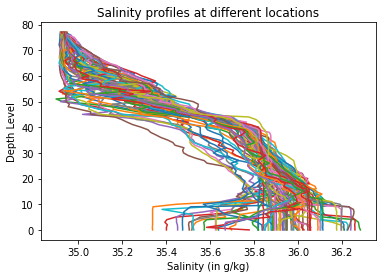

Text(0.5, 1.0, 'profil de salinité à différents endroits')

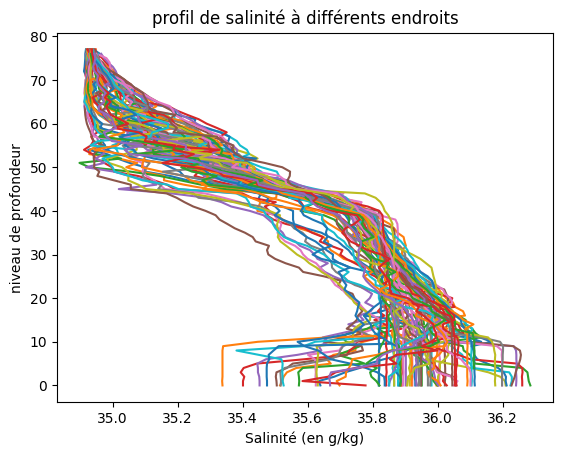

In [18]:
plt.plot(S,levels) ; # Le point-virgule empêche l'impression des objets de ligne
plt.xlabel("Salinité (en g/kg)") # Prend une chaîne de caractères comme argument
plt.ylabel("niveau de profondeur")
plt.title("profil de salinité à différents endroits")

Faites plus de plots ci-dessous:

Text(0.5, 1.0, 'profil de température à différents endroits')

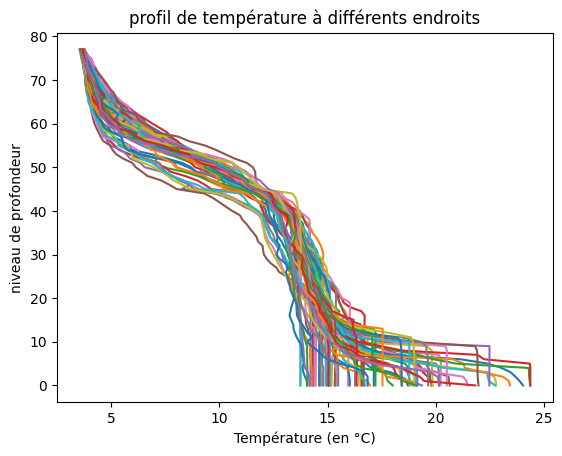

In [19]:
plt.plot(T, levels) ;
plt.xlabel("Température (en °C)")
plt.ylabel("niveau de profondeur")
plt.title("profil de température à différents endroits")


Text(0.5, 1.0, 'profil de pression à différents endroits')

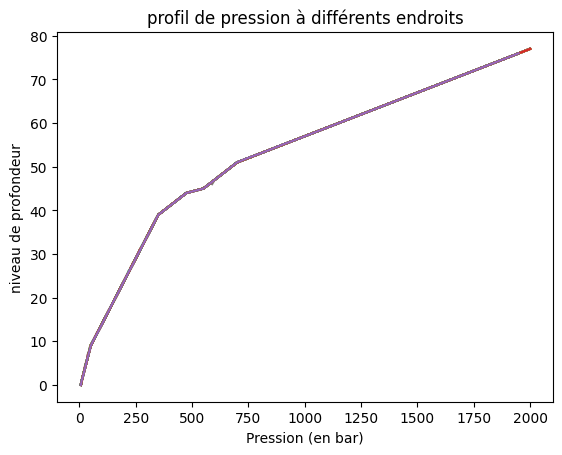

In [20]:
plt.plot(P, levels) ;
plt.xlabel("Pression (en bar)")
plt.ylabel("niveau de profondeur")
plt.title("profil de pression à différents endroits")

Text(0.5, 1.0, 'profil de densité relative à différents endroits')

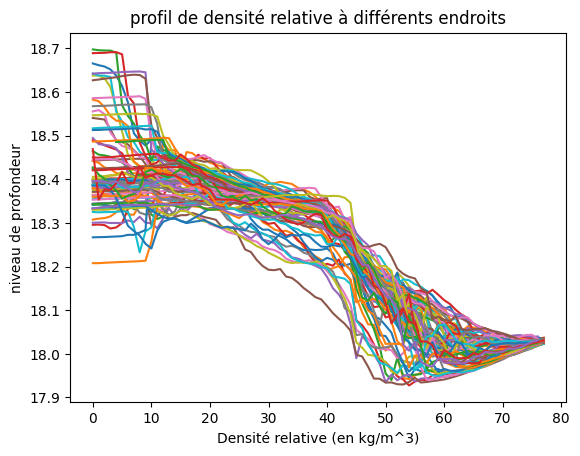

In [21]:
plt.plot(density_relativ)
plt.xlabel("Densité relative (en kg/m^3)")
plt.ylabel("niveau de profondeur")
plt.title("profil de densité relative à différents endroits")

**Q5) Calculez la moyenne et l'écart-type de `T`, `S`, `P`, et `seawater_density` à chaque profondeur dans `level`.

Conseil : Vous pouvez lire la documentation sur [ce lien](https://numpy.org/doc/stable/reference/generated/numpy.mean.html) et [ce lien](https://numpy.org/doc/stable/reference/generated/numpy.std.html).

Conseil 2 : Vous pouvez vérifier que vous avez pris la moyenne et les écarts types le long des axes corrects en vérifiant la "forme" de vos résultats.

Calculez les moyennes...

In [22]:
#@title Code à compléter (au besoin)
T_moy = np.mean(T,axis=0)
S_moy = np.mean(S,axis=0)
P_moy = np.mean(P,axis=0)

print(S_moy)
print (T_moy)
print (P_moy)


[35.4300408  35.39465004 35.41946509 35.36729094 35.31889211 35.29478699
         nan 35.37124908         nan 35.34899849         nan 35.42966099
         nan 35.53971168         nan 35.56845851         nan 35.55401357
         nan 35.50498659         nan 35.53228598         nan 35.49372751
         nan         nan         nan 35.56759267         nan 35.61186756
         nan 35.57222195         nan 35.56442378         nan 35.54277215
         nan         nan         nan 35.62780463 35.64723328         nan
         nan 35.64025414         nan 35.63505564         nan         nan
 35.63838289         nan         nan 35.61901004         nan 35.59733934
         nan 35.58581944         nan 35.55439577         nan 35.52035777
         nan 35.5017442          nan 35.58210309         nan 35.58704772
         nan 35.52519759         nan 35.50588598         nan 35.50078069
         nan 35.51122758         nan]
[10.88915385 10.7282564  10.9336282  10.75679484 10.38166666 10.08619236
         nan 

... et les écarts types.

In [23]:
#@title Code à compléter (au besoin)
T_standard_deviation= np.std(T,axis = 1)
S_standard_deviation= np.std(S,axis = 1)
P_standard_deviation= np.std(P,axis = 1)
print (T_standard_deviation )

[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan 0.84204226 0.90031954
 0.94661515 0.9902255  1.01786435 1.01690775 1.01944275 0.97987767
 0.94359878 0.88207755 0.82934499 0.7859263  0.71755907 0.68351183
 0.64382025 0.58990336 0.55077313 0.50187175 0.45673872 0.4085324
 0.36748504 0.33272584 0.2996815         nan        nan        nan
        nan        nan        nan        nan        nan        nan]


Vérifiez qu'elles ont la même forme que vos coordonnées de niveau vertical `lev` :

In [24]:
#@title Code à compléter (au besoin)
np.testing.assert_equal(levels.shape,lev.shape)

NameError: name 'lev' is not defined

**Q6) Faites maintenant des tracés similaires, mais ne montrez que les moyennes `T`, `S`, `P`, et `densité_de_l'eau_de_mer` à chaque profondeur. Faites apparaître les barres d'erreur sur chaque graphique en utilisant les écarts-types**.

Astuce : Si vous vous sentez aventureux, vous pouvez utiliser directement la fonction [`plt.errorbar`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html).

Astuce 2 : Vous devriez obtenir des graphiques similaires à celui ci-dessous

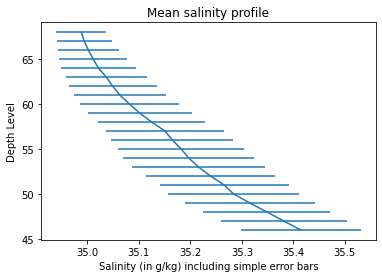

Text(0.5, 1.0, 'mean salinity profile')

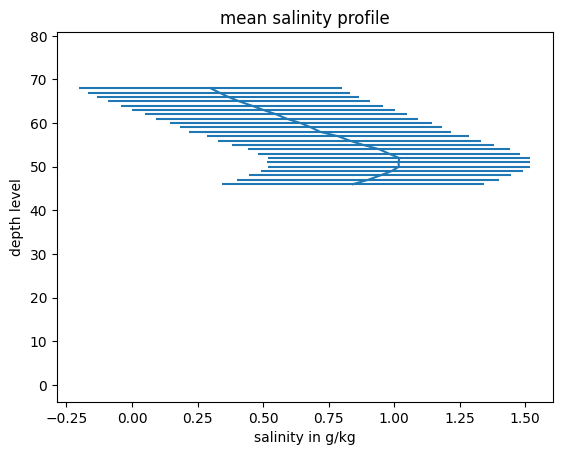

In [29]:

plt.errorbar(T_standard_deviation, levels, xerr=0.5)
plt.xlabel("salinity in g/kg")
plt.ylabel("depth level")
plt.title("mean salinity profile")

Encore trois plots et nous serons prêts 🙂 .

**Q7) Prise en compte des données manquantes**

Les profils contiennent de nombreuses valeurs manquantes. Celles-ci sont indiquées par la valeur spéciale "Not a Number", ou `np.nan`.

Lorsque vous prenez la moyenne ou l'écart type des données contenant des NaN, le résultat entier devient `NaN`. Au lieu de cela, si vous utilisez les fonctions spéciales `np.nanmean` et `np.nanstd`, vous dites à NumPy d'ignorer les NaN.

Recalculez les moyennes et les écarts types comme dans les sections précédentes en utilisant ces fonctions et tracez les résultats.

Conseil : Liens vers la documentation [`np.nanmean`](https://numpy.org/doc/stable/reference/generated/numpy.nanmean.html) et la documentation [`np.nanstd`](https://numpy.org/doc/stable/reference/generated/numpy.nanstd.html).

Recalculez les moyennes ci-dessous en ignorant les valeurs manquantes. Nous espérons que vous pouvez maintenant trouver la syntaxe complète vous-même 😎

In [46]:
T_moy = np.nanmean(T,axis=0)
S_moy = np.nanmean(S,axis=0)
P_moy = np.nanmean(P,axis=0)
print(T_moy)
print(S_moy)
print(P_moy)

11.104955983298781
[35.4300408  35.39465004 35.41946509 35.36729094 35.31889211 35.29478699
 35.36100511 35.37124908 35.34891307 35.34899849 35.40729954 35.42966099
 35.51981814 35.53971168 35.54430528 35.56845851 35.5806647  35.55401357
 35.5392197  35.50498659 35.50878659 35.53228598 35.63045247 35.49372751
 35.5177429  35.52225048 35.58433914 35.56759267 35.60761974 35.61186756
 35.59634236 35.57222195 35.58171032 35.56442378 35.56478292 35.54277215
 35.55147429 35.11615813 35.61279495 35.62780463 35.64723328 35.60949266
 35.63099869 35.64025414 35.64569092 35.63505564 35.6405114  35.64319987
 35.63838289 35.63683819 35.63682948 35.61901004 35.59347848 35.59733934
 35.5711339  35.58581944 35.59570783 35.55439577 35.56129347 35.52035777
 35.51150468 35.5017442  35.50419126 35.58210309 35.55621625 35.58704772
 35.5609059  35.52519759 35.55298709 35.50588598 35.43730481 35.50078069
 35.52662411 35.51122758 35.48976849]
[ 624.35898361  624.29614692  624.3230696   624.26537822  624.34103

De même, recalculez les écarts types en ignorant les valeurs manquantes.

In [48]:
T_standard_deviation= np.nanstd(T,axis = 0)
S_standard_deviation= np.nanstd(S,axis = 0)
P_standard_deviation= np.nanstd(P,axis = 0)
print (T_standard_deviation )
print (S_standard_deviation)
print (P_standard_deviation)

4.660526903885564
[0.39888195 0.37586639 0.39312288 0.37443596 0.3366238  0.33446605
 0.3329373  0.34331947 0.33040954 0.34588709 0.36656343 0.40648052
 0.38927523 0.41157996 0.40468192 0.43470446 0.43486052 0.41590938
 0.40052286 0.38946397 0.37580406 0.39769502 0.35667397 0.37108872
 0.38669662 0.41050203 0.37569606 0.38181676 0.41070094 0.39288466
 0.38509814 0.38055158 0.37642408 0.39141752 0.38103444 0.37368288
 0.37736081 0.14327276 0.38473858 0.39425691 0.41066646 0.3671246
 0.42292672 0.39885501 0.40092509 0.41324594 0.38808827 0.41557912
 0.4254033  0.40795096 0.40600536 0.41408983 0.40816009 0.40643161
 0.38177984 0.41042056 0.4046873  0.40106814 0.37212067 0.37640449
 0.35908328 0.36984557 0.37002343 0.41237824 0.35688953 0.34582579
 0.3727592  0.36832198 0.37887994 0.37099069 0.31713341 0.4012134
 0.39465577 0.38509608 0.37544183]
[594.58133163 594.66730307 594.61842288 594.6113135  594.68488273
 594.70331225 577.43688653 594.62034396 577.37520777 594.68460598
 577.36065617

**Q8) Créez un diagramme de dispersion des coordonnées longitudinales (`lon`) et latitudinales (`lat`) des flotteurs ARGO.**

Encore une fois, nous n'en avons pas parlé dans le tutoriel, mais il existe une fonction de diagramme de dispersion très pratique appelée [`plt.scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) fournie par l'interface Pyplot.

Bonus : Etiqueter votre figure en utilisant `plt.xlabel`, `plt.ylabel`, et `plt.title`.

Bonus 2 : Augmentez la taille de police de vos étiquettes en ajoutant un argument `fontsize=` aux fonctions d'étiquettes.

Bonus 3 : Rendez votre diagramme de dispersion plus beau en changeant les arguments de [`plt.scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) listés dans la documentation, par exemple `s=`.

Text(0.5, 1.0, 'coordonnées des flotteurs')

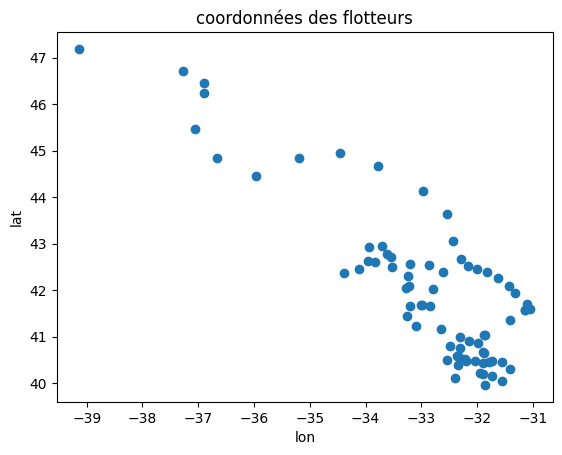

In [50]:
plt.scatter(lon, lat)
plt.xlabel("lon")
plt.ylabel("lat")
plt.title("coordonnées des flotteurs")

In [ ]:
#@title Code à compléter (au besoin)
plt.scatter(___,___)
___ # Bonus
___ # Plus de bonus

## Fonctions

**Q1) Ecrivez une fonction pour convertir l'unité que vous avez choisie pour les masses planétaires en $M_{Terre}$, la masse de la Terre**.

Par exemple, la masse de Jupiter est :

$M_{Jupiter} \approx 1898\times10^{24}kg \approx 318 M_{Terre}$

In [51]:
planetdict = {'mercure':0.330,'vénus':4.87,'terre':5.97,
              'mars':0.642,'jupiter':1898,'saturne':568,'uranus':86.8,'nepturne':102, 'pluto':0.013}

# unit: 10^24 kg

In [54]:
Mjupiter = planetdict['jupiter']/planetdict['terre']
print (Mjupiter)
# La fonction doit prendre la masse de la planète que vous voulez (par exemple, planetdict['mars']) et la diviser par la masse de la Terre.
# (planetdict['terre'])

# Testez que cela fonctionne pour jupiter (planetdict['jupiter']), la fonction devrait retourner 317.92294807370183


317.92294807370183


In [57]:
#@title Code à compléter (au besoin)
# Ecrivez votre fonction ici
# La fonction doit prendre la masse de la planète que vous voulez (par exemple, planetdict['mars']) et la diviser par la masse de la Terre.
# (planetdict['terre'])
def convert_mass_Mterre(planet_mass):
  return planet_mass/planetdict['terre']

#tester que cela fonctionne pour jupiter (planetdict['jupiter']), la fonction devrait retourner 317.92294807370183
convert_mass_Mterre(planetdict["jupiter"])

317.92294807370183

**Q2) Ecrivez maintenant une fonction unique qui peut convertir l'unité que vous avez choisie pour les masses planétaires en $M_{Terre}$ ou $M_{Jupiter}$ selon le mot-clé que vous avez spécifié**.

In [ ]:


# Vérifiez que votre fonction fonctionne : convertissez Mjupiter en Mterre et Mjupiter,
# Vous devriez voir 317.923 (Mterre) et 1.0 (Mjupiter)

In [60]:
#@title Code à compléter (au besoin)
# Écrivez votre fonction ici
def convert_m_Mterrejupiter(planet_mass,ourplanet='jupiter') :
  return planet_mass/planetdict[ourplanet]

# Vérifiez que votre fonction fonctionne : convertissez Mjupiter en Mterre et Mjupiter,
# Vous devriez voir 317.923 (Mterre) et 1.0 (Mjupiter)
print(convert_m_Mterrejupiter(planetdict['jupiter'],"terre"),convert_m_Mterrejupiter(planetdict['jupiter'],"jupiter"))

317.92294807370183 1.0


In [61]:
# Stocker le Mjupiter pour Q3
Mjupiter = convert_m_Mterrejupiter(planetdict['jupiter'], 'jupiter')

**Q3) Ecrivez une fonction qui prend un argument (la masse en $M_{Jupiter}$) et renvoie deux arguments (la masse en $M_{Terre}$ et la masse dans l'unité que vous avez choisie [la planète que vous voulez]).

In [ ]:
# Écrivez votre fonction ici
# Vérifiez que la conversion de la masse de Jupiter en $M_{Terre}$ et en $M_{Terre}$ fonctionne.
# l'unité choisie (par exemple, la planète Mars)
def

In [66]:
def mass_conversion_two_arguments(planet_mass) :
  a = planet_mass/planetdict["terre"]
  b = planet_mass/planetdict["jupiter"]
  return a, b
print (mass_conversion_two_arguments(planetdict["mars"]))

(0.10753768844221107, 0.0003382507903055848)


In [69]:
# Bonus : Utilisez la fonction de Q10 pour convertir la masse de Neptune en $M_{Jupiter}$.
# puis la fonction de Q3 pour la reconvertir dans l'unité que vous avez choisie
# Retrouvez-vous la valeur originale ?
def mass_conversion_two_arguments(planet_mass) :
  a = planet_mass/planetdict["terre"]
  b = planet_mass/planetdict["jupiter"]
  return a, b